In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt


In [4]:
fruit = pd.read_csv('C:/Users/Hp/Desktop/priya/fruit_data_with_colours.csv')


In [5]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
print(fruit.shape)


(59, 7)


In [7]:
print(fruit['fruit_name'].unique())


['apple' 'mandarin' 'orange' 'lemon']


In [8]:
fruit['fruit_name'].value_counts()


apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [9]:
###2. DATA VISUALISATION¶


In [10]:
import seaborn as sns


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


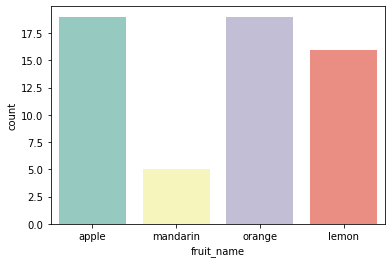

In [11]:
sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")
plt.show()


In [12]:
###Visualise using Bloxplot (to assess the distribution)¶


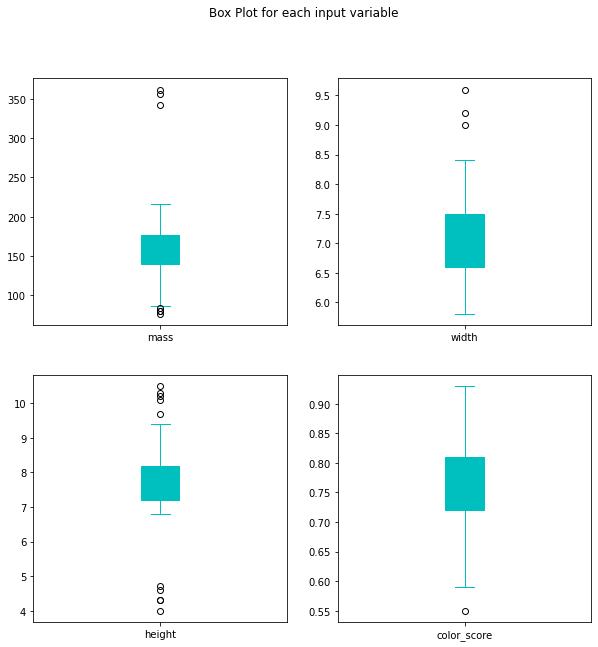

In [14]:
fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), 
                                        sharex=False, sharey=False, figsize=(10,10), 
                                        color ='c', patch_artist=True)
plt.suptitle("Box Plot for each input variable")
plt.savefig('fruits_boxplot')
plt.show()

In [15]:
###########Visualise using Histogram (to understand the distribution)¶


In [16]:
import pylab as pl


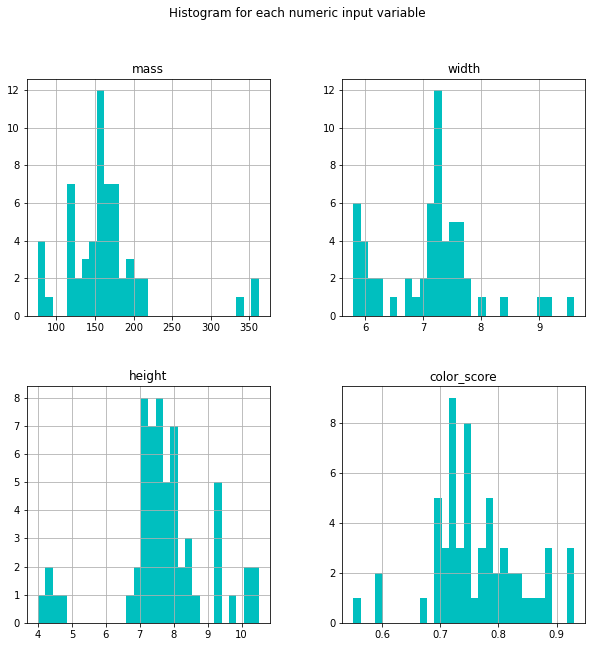

In [17]:
fruit.drop('fruit_label', axis=1).hist(bins=30, figsize=(10,10), color = "c", ec = "m", lw=0)
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_histogram')
plt.show()

In [18]:
##########Visualise using Scatter matrix¶


In [19]:
from pandas.plotting import scatter_matrix
from matplotlib import cm


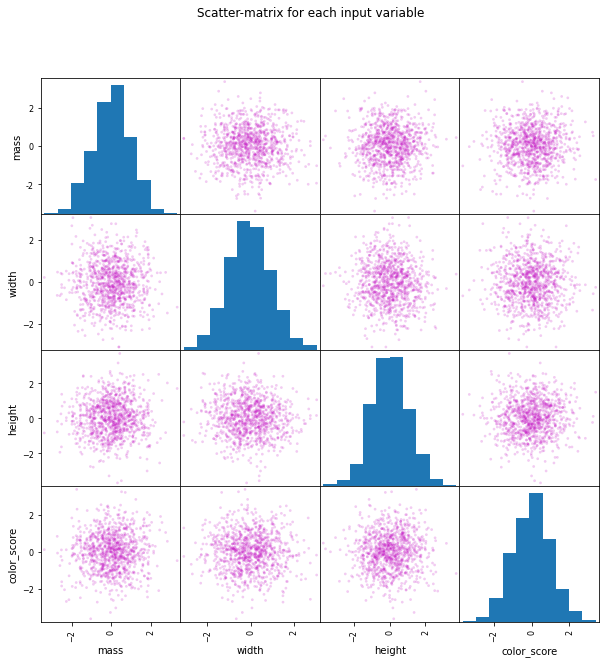

In [20]:
cmap = cm.get_cmap('gnuplot')
df = pd.DataFrame(np.random.randn(1000, 4), columns=['mass', 'width', 'height', 'color_score'])
scatter_matrix(df, alpha=0.2, cmap = cmap, figsize=(10,10), marker = '.', s=30, hist_kwds={'bins':10}, range_padding=0.05, color = 'm')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')

In [21]:
#########3. K-Nearest Neighbors¶


In [22]:
from sklearn.neighbors import KNeighborsClassifier


In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X = fruit[['mass','width','height','color_score']]
Y = fruit['fruit_name']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [26]:
X_train.describe()


,mass,width,height,color_score
count,47.000000,47.000000,47.000000,47.000000
mean,160.170213,7.061702,7.661702,0.760638
std,51.830543,0.814956,1.329196,0.072424
min,76.000000,5.800000,4.000000,0.550000
25%,131.000000,6.250000,7.250000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,176.000000,7.500000,8.200000,0.810000
max,356.000000,9.200000,10.500000,0.920000


In [27]:
X_test.describe()


,mass,width,height,color_score
count,12.000000,12.000000,12.000000,12.000000
mean,174.666667,7.275000,7.816667,0.771667
std,67.410996,0.837882,1.535539,0.095426
min,84.000000,6.000000,4.600000,0.600000
25%,141.500000,7.050000,7.175000,0.717500
50%,160.000000,7.150000,7.550000,0.750000
75%,180.500000,7.325000,8.225000,0.810000
max,362.000000,9.600000,10.300000,0.930000


In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [29]:
knn.score(X_test, y_test)
print("Accuracy for K=5 : ", knn.score(X_test, y_test))

Accuracy for K=5 :  0.5833333333333334


In [30]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=6 : ", knn.score(X_test, y_test))

Accuracy for K=6 :  0.6666666666666666


In [31]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=7 : ", knn.score(X_test, y_test))

Accuracy for K=7 :  0.6666666666666666


In [32]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=8 : ", knn.score(X_test, y_test))

Accuracy for K=8 :  0.4166666666666667


In [33]:
##########Data visualisation

In [34]:
neighbours = np.arange(1,10)
training_accuracy = np.empty(len(neighbours))
testing_accuracy = np.empty(len(neighbours))

In [35]:
for i in range(len(neighbours)):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train,y_train)
    training_accuracy[i] = knn.score(X_train,y_train)
    testing_accuracy[i] = knn.score(X_test,y_test)

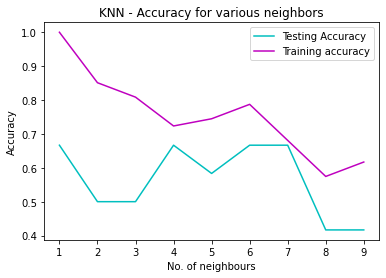

<Figure size 432x288 with 0 Axes>

In [36]:
plt.title('KNN - Accuracy for various neighbors')
plt.plot(neighbours, testing_accuracy, label = 'Testing Accuracy', color ='c')
plt.plot(neighbours, training_accuracy, label = 'Training accuracy', color ='m')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('knn - accuracy vs no of neighbours')

In [37]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets


In [38]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target
h = .02  

n_neighbors = 7

In [39]:
cmap_light = ListedColormap(['#FFFACD', '#7FFFD4', '#87CEFA'])
cmap_bold = ListedColormap(['#FF0000', '#228B22', '#0000FF'])

for weights in ['distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [40]:
Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()
plt.savefig('classification chart')

IndentationError: unexpected indent (<ipython-input-40-7589a3c256ce>, line 2)

<ipython-input-41-622a60c3af38>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


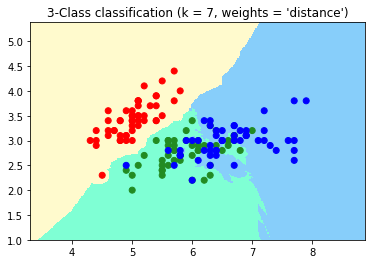

<Figure size 432x288 with 0 Axes>

In [41]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target
h = .02  # step size in the mesh

n_neighbors = 7

# Create color maps
cmap_light = ListedColormap(['#FFFACD', '#7FFFD4', '#87CEFA'])
cmap_bold = ListedColormap(['#FF0000', '#228B22', '#0000FF'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()
plt.savefig('classification chart')